# Probability and information theory

Resources: <br/>
Jaynes (2003) <br/>
Pearl (1988) <br/>
Ramsey (1926)

When we say that an outcome have a probability $p$ of ocurring, it means that if we repeated the experiment infinite many times the proportion $p$ of the repetition would result in that outcome, in other hand, where the propotition cannot be repeatable in this cases probability refers to a **degree of beleif**. the former kind of probability, related directly to the rates at which events occur, is known as **frequentist probability**, while the latter, related to qualitative levels of certainty, is known as **Bayesian probability**

In [68]:
import torch
import matplotlib.pyplot as plt

## Random Variables

On its own, a random variable is just a description of the states that are possible; it must be coupled with a probability distribution that specifies how likely each of these states are.


## Probability distributions
A probability distribution is a description of how likely a random variable or set of random variables is to take on each of its possible states. The way we describe probability distributions depends on whether the variables are discrete or continuous.

### Uniform distribution
Each state of the random variable $x$ have the same probability, that means:
$$P(x=x_i)= \frac{1}{k}$$

In [99]:
from torch.distributions import Uniform, Bernoulli, Multinomial, Normal
import torch.distributions as dist# for non-discrete

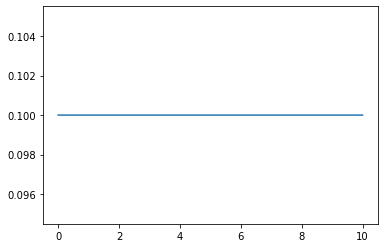

In [92]:
k = Uniform(0, 10).sample((100000,))
k = k.sort().values
plt.plot(k, Uniform(0, 10).log_prob(k).exp())
plt.show()

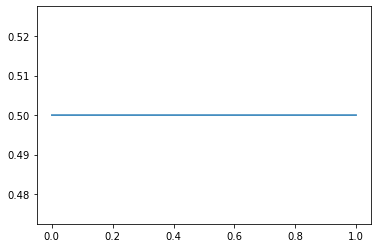

In [96]:
k = Bernoulli(0.5).sample((100000,))
k = k.sort().values
plt.plot(k, Bernoulli(0.5).log_prob(k).exp())
plt.show()

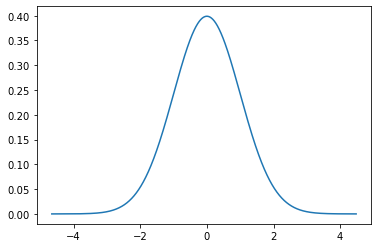

In [98]:
k = Normal(0, 1).sample((100000,))
k = k.sort().values
plt.plot(k, Normal(0, 1).log_prob(k).exp())
plt.show()

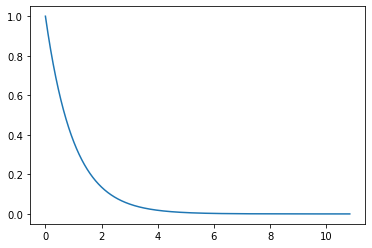

In [101]:
k = dist.Exponential(1).sample((10000,))
k = k.sort().values
plt.plot(k, dist.Exponential(1).log_prob(k).exp())
plt.show()

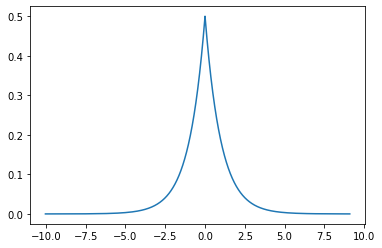

In [102]:
k = dist.Laplace(0, 1).sample((10000,))
k = k.sort().values
plt.plot(k, dist.Laplace(0, 1).log_prob(k).exp())
plt.show()

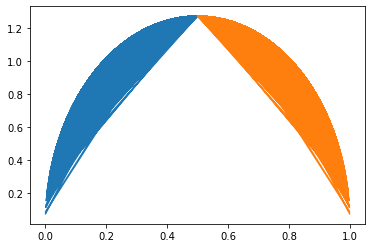

In [115]:
k = dist.Dirichlet(torch.tensor([1.5, 1.5])).sample((10000,))
k = k.sort().values
plt.plot(k, dist.Dirichlet(torch.tensor([1.5, 1.5])).log_prob(k).exp())
plt.show()

## Sigmoid function

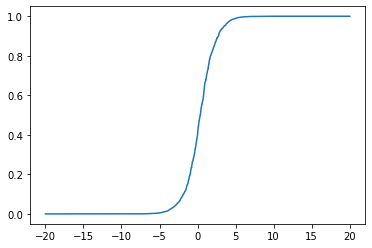

In [124]:
plt.plot(Uniform(-20,20).sample((10000,)).sort().values, torch.sigmoid(Uniform(-20,20).sample((10000,)).sort().values))
plt.show()

## Softplus

In [125]:
def softplus(x):
    return torch.log(1+x.exp())

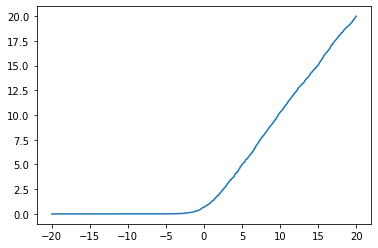

In [126]:
plt.plot(Uniform(-20,20).sample((10000,)).sort().values, softplus(Uniform(-20,20).sample((10000,)).sort().values))
plt.show()

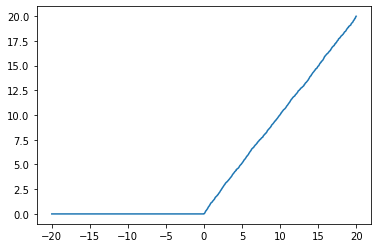

In [127]:
plt.plot(Uniform(-20,20).sample((10000,)).sort().values, torch.relu(Uniform(-20,20).sample((10000,)).sort().values))
plt.show()

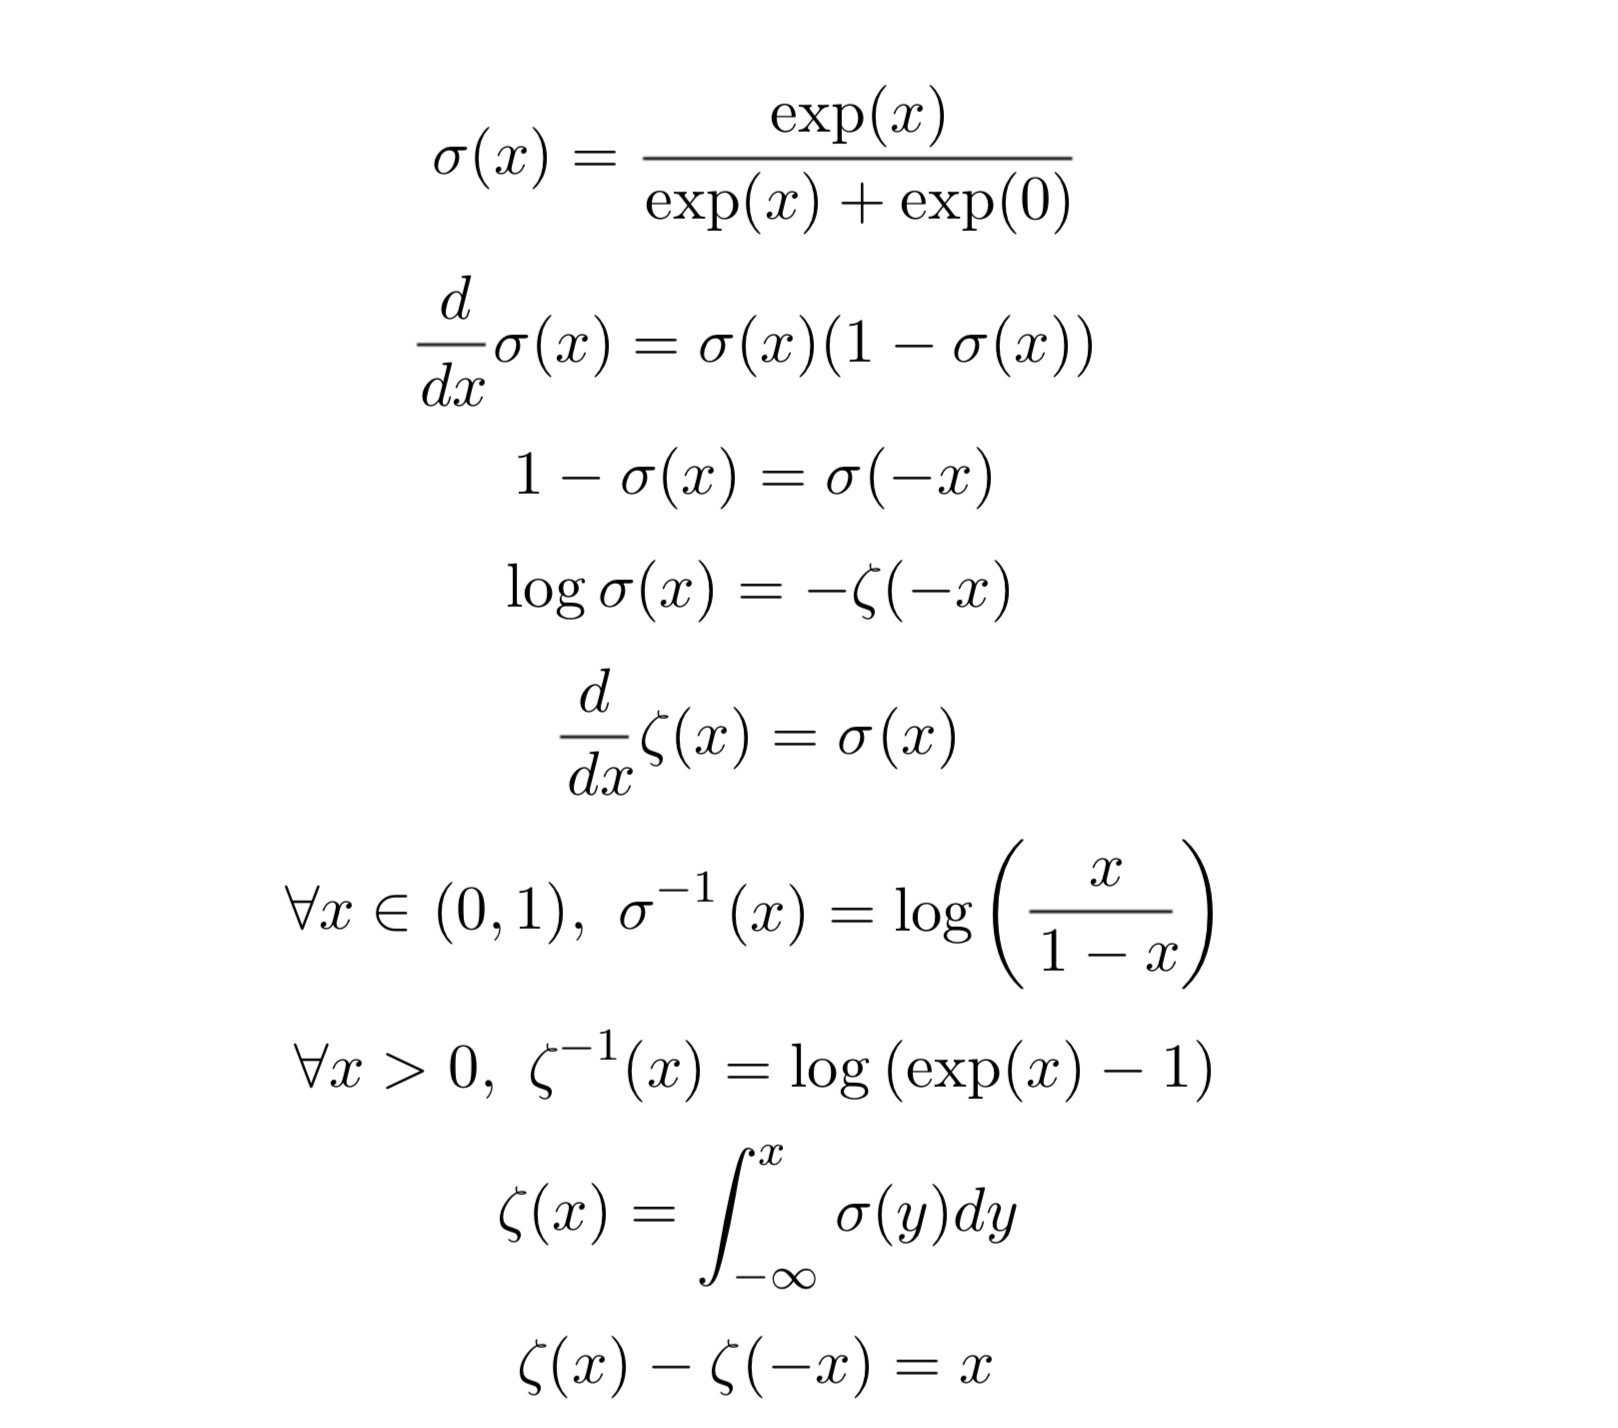

In [242]:
import torch

In [243]:
data = ["machine learning and religion",
       "machine learning and math",
       "medicine",
       "mathematic"]
tag = [
    ["cs", "rel"],
    ["cs", "ma"],
    ["med"],
    ["ma"]
]

In [244]:
cls = dict((t, idx )for idx, t in enumerate(set(x for t in tag for x in t)))

In [245]:
cls

{'rel': 0, 'ma': 1, 'med': 2, 'cs': 3}

In [246]:
from sklearn.feature_extraction.text import HashingVectorizer

In [247]:
hs = CountVectorizer()
matr = hs.fit_transform(data)

In [248]:
X = torch.tensor(matr.toarray(), dtype=torch.float)

In [249]:
I_c = torch.eye(len(cls))

In [250]:
(I_c.numpy())

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [251]:
import numpy as np

In [252]:
Y = np.array([sum(I_c[cls[cl]] for cl in t).numpy() for t in tag])

In [253]:
Y = torch.tensor(Y)

In [254]:
X, Y

(tensor([[1., 1., 1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0., 0.]]),
 tensor([[1., 0., 0., 1.],
         [0., 1., 0., 1.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.]]))

In [255]:
m, n = X.shape
W = torch.randn((20, n), requires_grad=True)
b = torch.randn((20,1), requires_grad=True)
W1 = torch.randn((25, 20), requires_grad=True)
b1 = torch.randn((25,1), requires_grad=True)
W2 = torch.randn((len(cls), 25), requires_grad=True)
b2 = torch.randn((len(cls),1), requires_grad=True)
variables = (W,b,W1,b1,W2,b2)

for i in range(1000):
    fcl = W.mm(X.T) + b
    nl = torch.relu(fcl)
    fcl1 = W1.mm(nl) + b1
    nl1 = torch.relu(fcl1)
    out = torch.sigmoid(W2.mm(fcl1) + b2)
    loss = (Y-out).norm()
    loss.backward()
    if i%100 == 0:
        print("loss: %s" %loss.item())
    with torch.no_grad():
        for var in variables:
            var -= 0.001 * var.grad

loss: 2.9730987548828125
loss: 2.0118250846862793
loss: 2.0
loss: 2.0
loss: 1.9999982118606567
loss: 1.7320507764816284
loss: 1.7320507764816284
loss: 1.732051134109497
loss: 1.7320507764816284
loss: 1.7320507764816284


In [256]:
X, Y

(tensor([[1., 1., 1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0., 0.]]),
 tensor([[1., 0., 0., 1.],
         [0., 1., 0., 1.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.]]))

In [241]:
import torch.nn as nn

In [257]:
m, D_in = X.shape
H = 100
_, D_out = Y.shape 

In [258]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [259]:
model(X)

tensor([[-0.3065,  0.0389,  0.1701, -0.0980],
        [-0.0877, -0.1860,  0.1325, -0.1554],
        [-0.1490,  0.0919,  0.0181, -0.1549],
        [-0.2050,  0.1856,  0.0313, -0.0307]], grad_fn=<AddmmBackward>)

In [260]:
loss_fn = nn.MSELoss(reduction='sum')

In [262]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X)

    # Compute and print loss.
    loss = loss_fn(y_pred, Y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 4.901363849639893
199 3.1132397651672363
299 1.902796983718872
399 1.1225625276565552
499 0.6340970396995544


In [266]:
model.eval()
with torch.no_grad():
    Y_pred = (model(X)>0.5).int()

In [267]:
Y_pred

tensor([[1, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]], dtype=torch.int32)

In [268]:
Y

tensor([[1., 0., 0., 1.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]])

In [270]:
cls_in = dict((idx, cl) for cl, idx in cls.items())
cls_in

{0: 'rel', 1: 'ma', 2: 'med', 3: 'cs'}

In [284]:
def decode(Y):
    values = []
    Y = Y.numpy()
    for i in Y:
        vla = []
        for idx, j in enumerate(i):
            if j==1:
                vla.append(cls_in[idx])
        values.append(vla)
    return values

In [285]:
decode(Y)

[['rel', 'cs'], ['ma', 'cs'], ['med'], ['ma']]